Archivo ZIP descomprimido en: /content/glaucoma/
Archivos extraídos: ['glaucoma']
Archivos dentro de la carpeta 'glaucoma': ['1284_right.jpg', '_135_2706541.jpg', '1228_left.jpg', 'Glaucoma_099.png', '_146_6435949.jpg', '_289_8793154.jpg', '_252_4705064.jpg', '_213_4395697.jpg', '_279_2768381.jpg', '_241_994470.jpg', '_71_9012457.jpg', '_369_4797724.jpg', '1279_right.jpg', '1967_left.jpg', '_14_3746939.jpg', '_116_1943666.jpg', '_243_95702.jpg', '_225_247208.jpg', '_339_938566.jpg', '_353_9347543.jpg', '_233_3404764.jpg', '1214_right.jpg', '_16_8305794.jpg', '1213_left.jpg', '1411_left.jpg', '_18_2435759.jpg', '1386_left.jpg', '_53_1457470.jpg', '1392_left.jpg', '_213_2572866.jpg', '1279_left.jpg', 'Glaucoma_037.png', '_46_8083273.jpg', '1959_left.jpg', '_203_5093586.jpg', '_19_7932720.jpg', '_406_3482388.jpg', '1470_left.jpg', '_265_1562215.jpg', '_296_3140840.jpg', 'Glaucoma_014.png', '_383_5927182.jpg', '_326_7155812.jpg', '1238_right.jpg', '_110_299285.jpg', '1251_left.jpg', '1220_

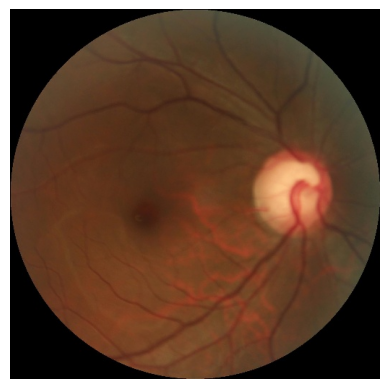

In [ ]:
import zipfile
import os
import cv2
import matplotlib.pyplot as plt

# Paso 1: Descomprimir el archivo ZIP
zip_file_path = '/content/glaucoma.zip'
extract_dir = '/content/glaucoma/'

# Verificar si el archivo ZIP existe
if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Archivo ZIP descomprimido en: {extract_dir}")
else:
    print(f"El archivo ZIP no se encuentra en la ruta: {zip_file_path}")

# Paso 2: Verificar los archivos extraídos
extracted_files = os.listdir(extract_dir)
print("Archivos extraídos:", extracted_files)

# Paso 3: Verificar si hay subcarpetas o archivos de imagen
if 'glaucoma' in extracted_files:
    # Verificar archivos dentro de la subcarpeta 'glaucoma'
    subfolder_path = os.path.join(extract_dir, 'glaucoma')
    subfolder_files = os.listdir(subfolder_path)
    print("Archivos dentro de la carpeta 'glaucoma':", subfolder_files)

    # Intentar cargar una imagen de la carpeta 'glaucoma'
    if len(subfolder_files) > 0:
        image_path = os.path.join(subfolder_path, subfolder_files[0])  # Tomamos el primer archivo
        if os.path.exists(image_path):
            print(f"El archivo de imagen existe en la ruta: {image_path}")
            # Cargar la imagen usando OpenCV
            image = cv2.imread(image_path)

            # Verificar si la imagen se cargó correctamente
            if image is not None:
                # Convertir de BGR (OpenCV) a RGB (matplotlib)
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                # Mostrar la imagen
                plt.imshow(image_rgb)
                plt.axis('off')  # Ocultar los ejes
                plt.show()
            else:
                print("No se pudo cargar la imagen correctamente.")
        else:
            print(f"El archivo de imagen no se encuentra en la ruta: {image_path}")
    else:
        print("No hay archivos dentro de la carpeta 'glaucoma'.")
else:
    print("No se encontró la carpeta 'glaucoma' dentro de los archivos extraídos.")

In [ ]:
import os
folder_path = '/content/glaucoma/'
files = os.listdir(folder_path)
print(files)

['glaucoma']


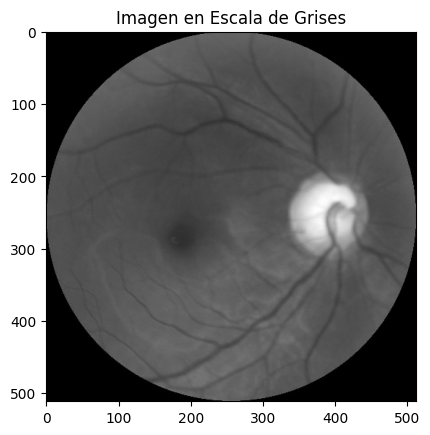

In [ ]:
# Cargar la imagen
image_path = '/content/glaucoma/glaucoma/1284_right.jpg'  # O la ruta de tu imagen

# Verificar si el archivo de imagen existe
if os.path.exists(image_path):
    image = cv2.imread(image_path)

    # Verificar si la imagen se cargó correctamente
    if image is not None:
        # Convertir a escala de grises
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Mostrar la imagen
        plt.imshow(gray_image, cmap='gray')
        plt.title('Imagen en Escala de Grises')
        plt.show()
    else:
        print(f"Error: No se pudo cargar la imagen desde {image_path}. Verifica la ruta y el formato del archivo.")
else:
    print(f"Error: El archivo de imagen no se encuentra en la ruta: {image_path}")

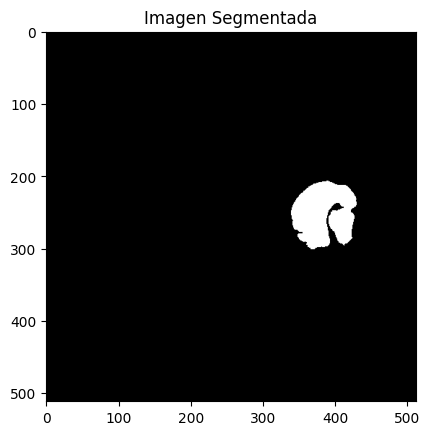

In [ ]:
# Umbralización
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Mostrar la imagen segmentada
plt.imshow(thresholded_image, cmap='gray')
plt.title('Imagen Segmentada')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

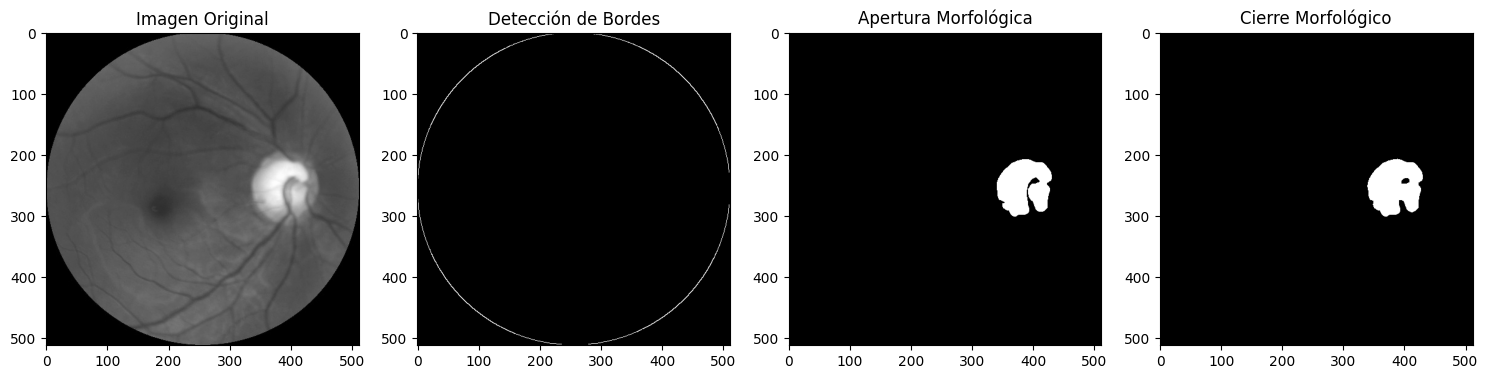

In [ ]:
# Verificar si la imagen se cargó correctamente
if image is not None:
    # Convertir a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 1. Filtro Gaussiano para suavizar la imagen
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # 2. Detección de bordes con Canny
    edges = cv2.Canny(blurred_image, 100, 200)

    # 3. Umbralización para segmentar la imagen
    ret, thresh = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

    # 4. Morfología matemática para mejorar la segmentación
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Mostrar las imágenes
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Imagen Original')

    plt.subplot(1, 4, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Detección de Bordes')

    plt.subplot(1, 4, 3)
    plt.imshow(opening, cmap='gray')
    plt.title('Apertura Morfológica')

    plt.subplot(1, 4, 4)
    plt.imshow(closing, cmap='gray')
    plt.title('Cierre Morfológico')

    plt.tight_layout()
    plt.show()

else:
    print(f"Error: No se pudo cargar la imagen desde {image_path}. Verifica la ruta y el formato del archivo.")

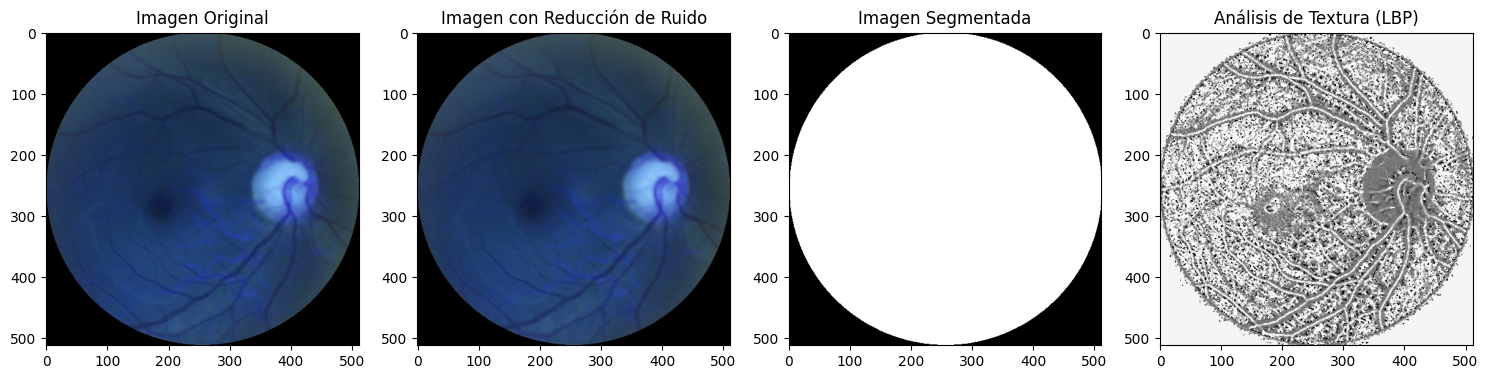

In [ ]:
!pip install scikit-image

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern  # For texture analysis
from skimage.filters import median  # For noise reduction

# Verificar si la imagen se cargó correctamente
if image is not None:
    # 1. Reducción de ruido (filtro de mediana)
    denoised_image = median(image)

    # 2. Convertir a escala de grises
    gray_image = cv2.cvtColor(denoised_image.astype(np.uint8), cv2.COLOR_BGR2GRAY)

    # 3. Segmentación (Umbralización Otsu)
    ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 4. Análisis de textura (Local Binary Pattern - LBP)
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')

    # Mostrar las imágenes
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title('Imagen Original')

    plt.subplot(1, 4, 2)
    plt.imshow(denoised_image)
    plt.title('Imagen con Reducción de Ruido')

    plt.subplot(1, 4, 3)
    plt.imshow(thresh, cmap='gray')
    plt.title('Imagen Segmentada')

    plt.subplot(1, 4, 4)
    plt.imshow(lbp, cmap='gray')
    plt.title('Análisis de Textura (LBP)')

    plt.tight_layout()
    plt.show()

else:
    print(f"Error: No se pudo cargar la imagen desde {image_path}. Verifica la ruta y el formato del archivo.")

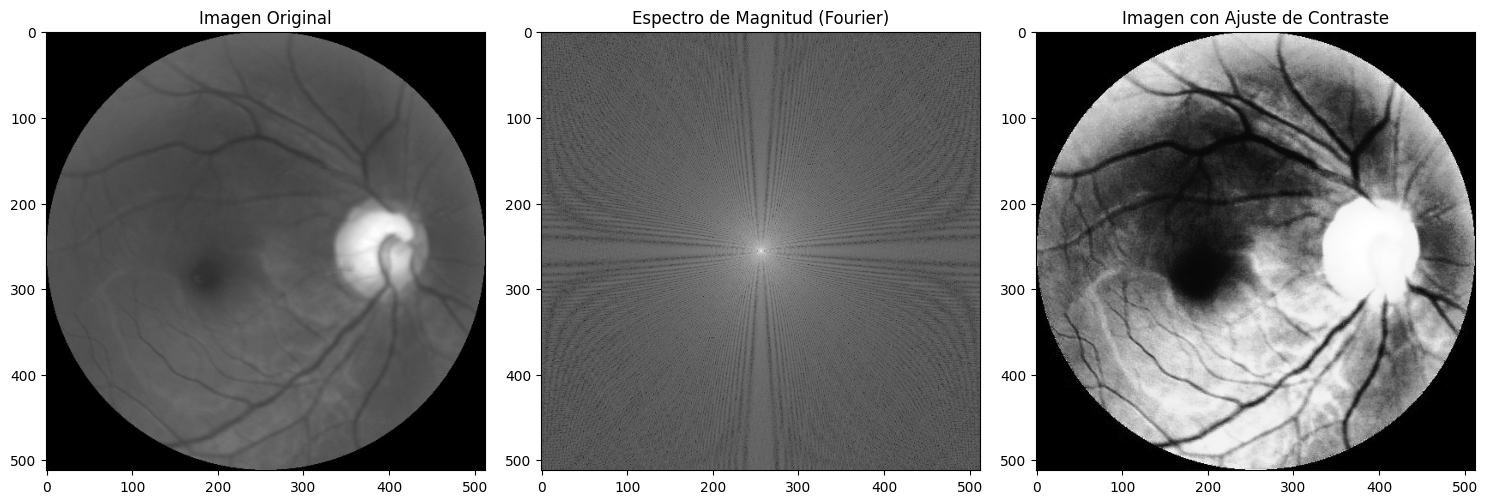

In [ ]:
# Verificar si la imagen se cargó correctamente
if image is not None:
    # 1. Convertir a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 2. Transformada de Fourier
    f = np.fft.fft2(gray_image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # 3. Ajuste de contraste
    # Método 1: Estiramiento de contraste
    # alpha = 1.5  # Factor de contraste
    # beta = 0    # Brillo
    # adjusted_image = cv2.convertScaleAbs(gray_image, alpha=alpha, beta=beta)

    # Método 2: Ecualización de histograma
    adjusted_image = cv2.equalizeHist(gray_image)

    # Mostrar las imágenes
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Imagen Original')

    plt.subplot(1, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Espectro de Magnitud (Fourier)')

    plt.subplot(1, 3, 3)
    plt.imshow(adjusted_image, cmap='gray')
    plt.title('Imagen con Ajuste de Contraste')

    plt.tight_layout()
    plt.show()

else:
    print(f"Error: No se pudo cargar la imagen desde {image_path}. Verifica la ruta y el formato del archivo.")

In [ ]:
# Verificar si la imagen se cargó correctamente
if image is not None:
    # 1. Convertir a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 2. Segmentación (Umbralización Otsu)
    ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 3. Encontrar contornos
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 4. Calcular áreas y mostrar resultados
    total_area = 0  # Inicializar el área total
    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        total_area += area  # Sumar al área total

        # Dibujar contornos y mostrar áreas (opcional)
        # cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)  # Dibujar contorno en verde
        # cv2.putText(image, f"Area {i+1}: {area:.2f}", (contour[0][0][0], contour[0][0][1] - 10),
        #             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)  # Mostrar área en rojo

    print(f"Área total de los objetos segmentados: {total_area:.2f} pixels")

    # Mostrar la imagen con contornos (opcional)
    # cv2.imshow("Imagen con contornos y áreas", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

else:
    print(f"Error: No se pudo cargar la imagen desde {image_path}. Verifica la ruta y el formato del archivo.")

Área total de los objetos segmentados: 204557.00 pixels


In [ ]:
import pandas as pd

In [ ]:
# Obtener la resolución de la imagen (DPI) - Suponiendo 96 DPI si no se encuentra
dpi = image.shape[1] / 8.5  # Asumiendo una imagen de 8.5 pulgadas de ancho
# O obtener DPI de la metadata de la imagen si está disponible

# Verificar si la imagen se cargó correctamente
if image is not None:
    # 1. Convertir a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 2. Segmentación (Umbralización Otsu)
    ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 3. Encontrar contornos
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 4. Calcular áreas y almacenar datos en una lista
    data = []
    for i, contour in enumerate(contours):
        area_pixels = cv2.contourArea(contour)
        area_inches = area_pixels / (dpi**2)  # Convertir a pulgadas cuadradas
        x, y, w, h = cv2.boundingRect(contour)  # Obtener la ubicación del contorno
        data.append([f"Objeto {i+1}", f"({x}, {y}, {w}, {h})", area_pixels, area_inches])

    # 5. Crear la tabla usando pandas DataFrame
    df = pd.DataFrame(data, columns=["Objeto", "Ubicación", "Área (pixels)", "Área (pulgadas)"])

    # 6. Mostrar la tabla
    print(df)

else:
    print(f"Error: No se pudo cargar la imagen desde {image_path}. Verifica la ruta y el formato del archivo.")

     Objeto         Ubicación  Área (pixels)  Área (pulgadas)
0  Objeto 1  (1, 1, 511, 511)       204557.0        56.378339


In [ ]:
# Obtener la resolución de la imagen (DPI) - Suponiendo 96 DPI si no se encuentra
dpi = image.shape[1] / 8.5  # Asumiendo una imagen de 8.5 pulgadas de ancho
# O obtener DPI de la metadata de la imagen si está disponible

# Verificar si la imagen se cargó correctamente
if image is not None:
    # 1. Convertir a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 2. Segmentación (Umbralización Otsu)
    ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 3. Encontrar contornos
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 4. Calcular áreas y almacenar datos en una lista
    data = []
    for i, contour in enumerate(contours):
        area_pixels = cv2.contourArea(contour)
        area_inches = area_pixels / (dpi**2)  # Convertir a pulgadas cuadradas
        x, y, w, h = cv2.boundingRect(contour)  # Obtener la ubicación del contorno
        data.append([f"Objeto {i+1}", f"({x}, {y}, {w}, {h})", area_pixels, area_inches])

        # Dibujar el contorno y el número del objeto en la imagen original
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)  # Dibujar contorno en verde
        cv2.putText(image, f"Objeto {i+1}", (x, y - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # 5. Crear la tabla usando pandas DataFrame
    df = pd.DataFrame(data, columns=["Objeto", "Ubicación", "Área (pixels)", "Área (pulgadas)"])

    # 6. Mostrar la tabla
    print(df)

    # 7. Mostrar la imagen con los contornos marcados
    cv2.imshow("Imagen con contornos marcados", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    print(f"Error: No se pudo cargar la imagen desde {image_path}. Verifica la ruta y el formato del archivo.")

     Objeto         Ubicación  Área (pixels)  Área (pulgadas)
0  Objeto 1  (1, 1, 511, 511)       204557.0        56.378339


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow
